In [1]:
import itertools as itr
import sys
import scipy
import os  
import re
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
from scipy import stats
import scipy.stats as ss

# these are for the geographical data
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# sklearn libraries
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, validation_curve, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

sns.set()

# Import the data and get a quick feel of it with head, describe, data types, etc...

In [2]:
# Import data from .csv files
housing_data = pd.read_csv("Melbourne_housing_FULL.csv", delimiter = ',')

In [3]:
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
# Remove duplicates if any
housing_data = housing_data.drop_duplicates(keep='first')

In [6]:
# Shape and type of the data
print housing_data.shape
print ''
housing_data.dtypes

(34856, 21)



Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
# How many NaN per column? 
housing_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# CHECK BEDROOMS2

/home/viscio/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


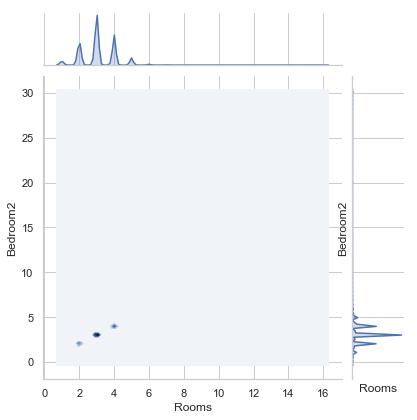

In [8]:
# Rooms vs. Bedroom2
def plot_desity_2d(pd, cols, col_y = 'Bedroom2', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=pd, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(housing_data, ['Rooms']) 

In [9]:
# Bedroom2 can be dropped, since it seems a little bit vague in its description 
# and really correlated with "rooms" and "bedrooms"
housing_data = housing_data.drop(axis = 0, columns = ['Bedroom2'])

In [10]:
# Check some weird outlier in some data columns... 
print housing_data['Rooms'].value_counts()
print ''
print housing_data['Bathroom'].value_counts()
print ''
print housing_data['Car'].value_counts()

3     15083
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

1.0     12969
2.0     11064
3.0      2180
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

2.0     12213
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
12.0        1
18.0        1
Name: Car, dtype: int64


# CHECK BATHROOMS, LANDSIZE, BUILDINGAREA

In [11]:
# Let's start with Bathrooms More tha 7 bathrooms seem really weird values. 
housing_data.loc[housing_data.Bathroom>7].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125.0,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0


If we consider entire properties, these data points could make sense... they can be entire buildings, with different units, sold together (for example, 8 rooms and 8 bathrooms, with a large lansize, can be a complex with 8 different studio rooms/units consisting in one room and one bathroom each). 

In [12]:
# We have some entries with really small values for Landsize and BuildingArea. Let's check them.  
print housing_data['Landsize'].loc[housing_data.Landsize<=5].count()
print housing_data['BuildingArea'].loc[housing_data.BuildingArea<=5].count()

2444
147


In [13]:
weird_landsize = housing_data.loc[housing_data.Landsize<=0]
weird_buildingarea = housing_data.loc[housing_data.BuildingArea<=0]
print weird_landsize.describe()
print ''
print weird_buildingarea.describe()

             Rooms         Price     Distance     Postcode     Bathroom  \
count  2437.000000  1.942000e+03  2437.000000  2437.000000  2437.000000   
mean      1.985228  6.445366e+05     6.320312  3109.588839     1.253590   
std       0.722461  3.566889e+05     3.505737    63.792755     0.510675   
min       1.000000  8.500000e+04     0.000000  3000.000000     0.000000   
25%       2.000000  4.342500e+05     3.800000  3054.000000     1.000000   
50%       2.000000  5.600000e+05     5.900000  3122.000000     1.000000   
75%       2.000000  7.400000e+05     8.000000  3163.000000     1.000000   
max       6.000000  3.900000e+06    38.000000  3207.000000     7.000000   

               Car  Landsize  BuildingArea    YearBuilt    Lattitude  \
count  2437.000000    2437.0   1327.000000  1605.000000  2432.000000   
mean      1.132130       0.0     84.857581  1978.513396   -37.826332   
std       0.566387       0.0     66.317149    27.916300     0.049479   
min       0.000000       0.0      1.

Zero land size could be indicative of 'zero-lot-line' homes - residential real estate in which the structure comes up to or very near the edge of the property line. We keep them. 
We just remove zero BuildingArea from the database, because that seems impossible. 

In [14]:
housing_data = housing_data[housing_data['BuildingArea']!=0]

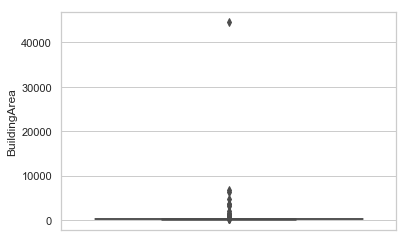

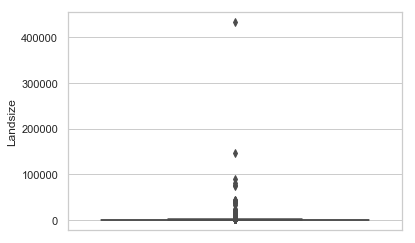

In [15]:
# Maximum values for Landsize and BuildingArea seem off too... let's check them.
sns.boxplot(data = housing_data, y = 'BuildingArea')
plt.show()
sns.boxplot(data = housing_data, y = 'Landsize')
plt.show()

I would say that there are two extreme outliers that can be resuls of errors in the data insertion in a previous time. We can probably remove them. 

In [16]:
i = housing_data[(housing_data['Landsize'] > 300000) | (housing_data['BuildingArea'] > 30000)].index
housing_data = housing_data.drop(i)

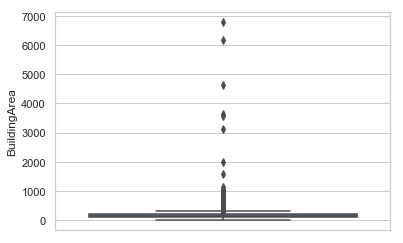

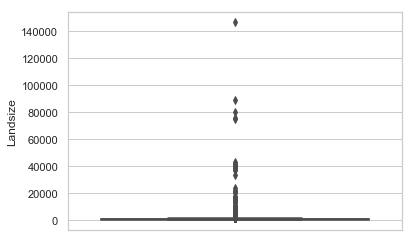

In [17]:
sns.boxplot(data = housing_data, y = 'BuildingArea')
plt.show()
sns.boxplot(data = housing_data, y = 'Landsize')
plt.show()

# CHECKING YEARBUILT

In [18]:
# Now let's work on "YearBuilt" that has some odd values too
housing_data['YearBuilt'].loc[housing_data.YearBuilt > 2018].count()
housing_data.loc[housing_data.YearBuilt > 2018].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480.0
33033,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,17/03/2018,11.4,3204.0,1.0,4.0,635.0,242.0,2019.0,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795.0


In [19]:
# These are two typos. Let's fix them
housing_data['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)
housing_data.loc[housing_data['YearBuilt'] < 1800, 'YearBuilt']

16424    1196.0
Name: YearBuilt, dtype: float64

In [20]:
# The value is probably 1916, not 1196
housing_data['YearBuilt'].replace([1196], [1916], inplace=True)

In [21]:
# Instead of YearBuilt, let's use a feature that has a clear incremental value with the age of the property.
housing_data['HouseAge'] = 2018-housing_data['YearBuilt']
housing_data.drop(axis = 1, columns = ['YearBuilt'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,HouseAge
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,118.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,118.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,NaN
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,4.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,2.0,2.0,400.0,220.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0,12.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,1.0,2.0,201.0,NaN,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,118.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,2.0,1.0,202.0,NaN,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0,118.0


In [22]:
# Let's work on date sold. Let's group in seasons (or months, but let's start with season)

housing_data['Date'] = pd.to_datetime(housing_data['Date'])

# calculate day of year
housing_data['Day'] = housing_data['Date'].dt.dayofyear
# Create year
housing_data['SellingYear'] = housing_data['Date'].dt.year

# Define seasons
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

seasons = []
for i in housing_data['Day']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    seasons.append(season)   

# Adding also selling month data
housing_data['SellingMonth'] = housing_data['Date'].dt.month
    
#add the resulting column to the dataframe (after transforming it as a Series)
housing_data['SellingSeason']= pd.Series(seasons)

# Remove two columns not useful anymore
#housing_data.drop(columns = ['Day', 'Date'], inplace = True)

# CHECKING CAR

In [23]:
print housing_data['Car'].loc[housing_data.Car>8].count()

14


In [24]:
weird_car = housing_data[housing_data['Car'] > 8]
weird_car = weird_car.drop(axis = 1, columns = ['Address', 'SellerG', 'Postcode'])
weird_car.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,HouseAge,Day,SellingYear,SellingMonth,SellingSeason
4324,Fitzroy North,5,h,NaN,S,2016-08-28,3.5,2.0,11.0,1010.0,...,Moreland City Council,-37.78710,144.99250,Northern Metropolitan,6244.0,NaN,241,2016,8,summer
6017,Kew,2,h,NaN,S,2016-09-24,5.6,2.0,26.0,267.0,...,Boroondara City Council,-37.79520,145.03220,Southern Metropolitan,10331.0,7.0,268,2016,9,fall
14651,Surrey Hills,3,h,2100000.0,VB,2017-01-07,10.2,1.0,9.0,841.0,...,Boroondara City Council,-37.83729,145.10929,Southern Metropolitan,5457.0,58.0,7,2017,1,winter
15449,Bayswater,4,h,925000.0,SP,2017-06-17,23.2,1.0,10.0,993.0,...,Knox City Council,-37.84688,145.25632,Eastern Metropolitan,5030.0,52.0,168,2017,6,spring
18923,Dandenong,3,h,880000.0,S,2017-07-22,24.7,2.0,10.0,734.0,...,Greater Dandenong City Council,-37.96969,145.21043,South-Eastern Metropolitan,10894.0,NaN,203,2017,7,summer


All these are houses. I could imagine a situation of a unit in a building with a lot of parking slots, but a house/detached/semidetached/villa having more than 10 parking slots seems unreasonable. 

In [25]:
# Let's remove the strange outlier...
housing_data = housing_data[housing_data.Car != 26]

# REMOVE SOME NAN ROWS FROM COLUMNS WITH VERY FEW NAN

In [26]:
# Columns are Distance, Postcode, CouncilArea, Regionname, Propertycount
housing_data = housing_data.dropna(subset=['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'])

In [27]:
# Let's reset indexes after all these dropping and modifying steps
housing_data.reset_index()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,HouseAge,Day,SellingYear,SellingMonth,SellingSeason
0,0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,...,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,NaN,69,2016,3,winter
1,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,...,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,NaN,72,2016,3,winter
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,...,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,118.0,93,2016,4,spring
3,3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,...,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,NaN,93,2016,4,spring
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,...,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,118.0,93,2017,4,spring
5,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,...,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,NaN,93,2017,4,spring
6,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,...,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,4.0,97,2016,4,spring
7,7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,...,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0,12.0,160,2016,6,spring
8,8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,...,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,118.0,160,2016,6,spring
9,9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,...,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0,118.0,160,2016,6,spring


# DATA VISUALIZATION

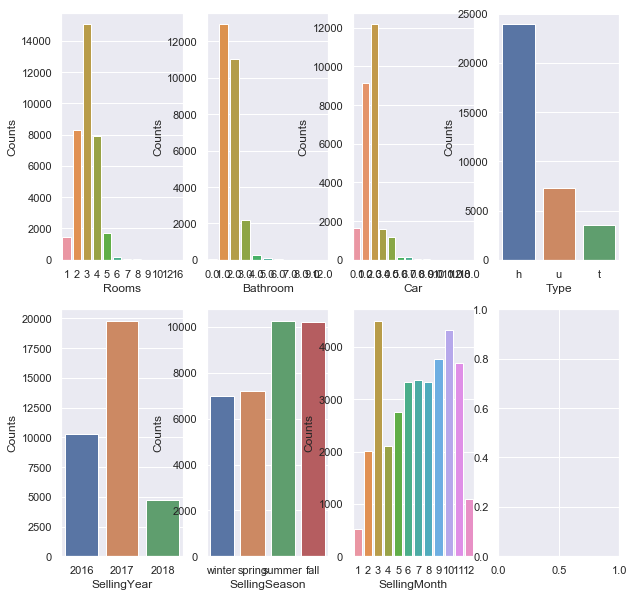

In [28]:
# Quick feel at general numbers for themore "categorical" variables
sns.set_style('darkgrid')
f, axes = plt.subplots(2,4, figsize = (10,10))

# Plot [0,0]
sns.countplot(x='Rooms', data = housing_data, ax = axes[0, 0])
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Counts')
# Plot [0,1]
sns.countplot(x='Bathroom', data = housing_data, ax = axes[0, 1])
axes[0,1].set_xlabel('Bathroom')
axes[0,1].set_ylabel('Counts')
# Plot [0,2]
sns.countplot(x='Car', data = housing_data, ax = axes[0, 2])
axes[0,2].set_xlabel('Car')
axes[0,2].set_ylabel('Counts')
# Plot [0,3]
sns.countplot(x='Type', data = housing_data, ax = axes[0, 3])
axes[0,3].set_xlabel('Type')
axes[0,3].set_ylabel('Counts')
# Plot [1,0]
sns.countplot(x='SellingYear', data = housing_data, ax = axes[1, 0])
axes[1,0].set_xlabel('SellingYear')
axes[1,0].set_ylabel('Counts')
# Plot [1,1]
sns.countplot(x='SellingSeason', data = housing_data, ax = axes[1, 1])
axes[1,1].set_xlabel('SellingSeason')
axes[1,1].set_ylabel('Counts')
# Plot [1,2]
sns.countplot(x='SellingMonth', data = housing_data, ax = axes[1, 2])
axes[1,2].set_xlabel('SellingMonth')
axes[1,2].set_ylabel('Counts')


plt.show()

The most tipical proprty sold has 3 rooms, 1 bathroom and 2 cars, it's been sold in 2017, during either summer or fall (mostly typical in March or in October). 

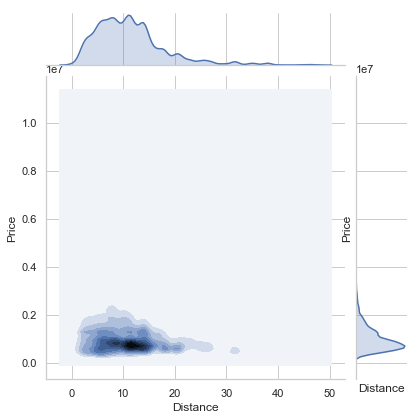

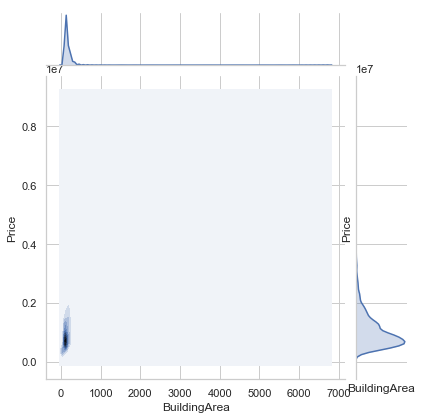

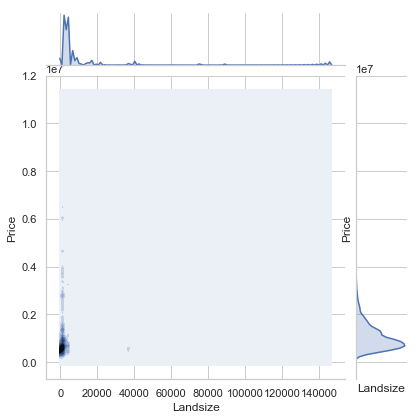

In [29]:
# Relations between Price and Distance/BuildingArea/Landsize
def plot_desity_2d(df, cols, col_y = 'Price', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=df, kind=kind)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.show()

num_cols = ['Distance', 'BuildingArea', 'Landsize']
plot_desity_2d(housing_data, num_cols) 

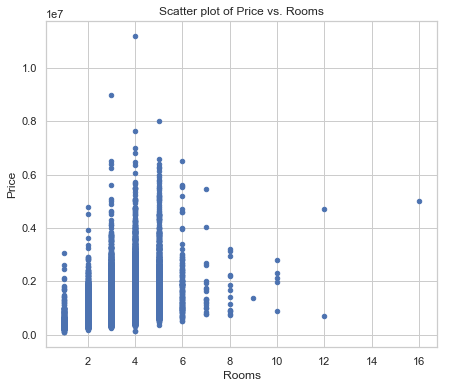

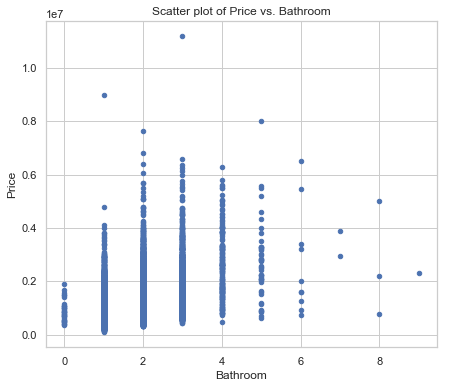

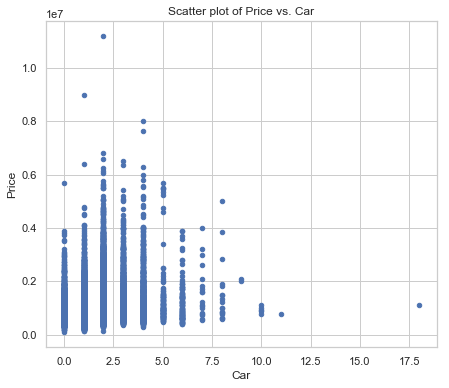

In [30]:
# Price, with respect to Rooms, Bathrooms and Car
def plot_scatter(df, cols, col_y = 'Price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['Rooms', 'Bathroom', 'Car']
plot_scatter(housing_data, num_cols)  

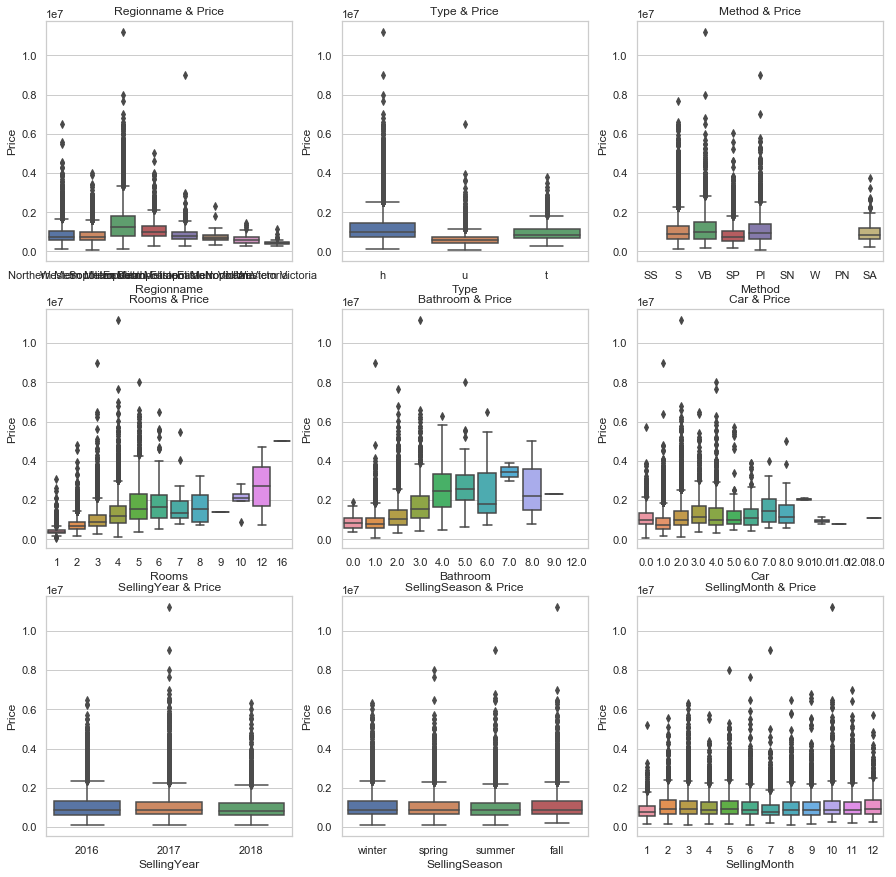

In [31]:
# Boxplots for many categorical variables
sns.set_style('whitegrid')
f, axes = plt.subplots(3,3, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = housing_data, x = 'Regionname', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Regionname')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Regionname & Price')
# Plot [0,1]
sns.boxplot(data = housing_data, x = 'Type', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Type')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Type & Price')
# Plot [0,2]
sns.boxplot(data = housing_data, x = 'Method', y = 'Price', ax = axes[0, 2])
axes[0,2].set_xlabel('Method')
axes[0,2].set_ylabel('Price')
axes[0,2].set_title('Method & Price')
# Plot [1,0]
sns.boxplot(data = housing_data, x = 'Rooms', y = 'Price', ax = axes[1, 0])
axes[1,0].set_xlabel('Rooms')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Rooms & Price')
# Plot [1,1]
sns.boxplot(data = housing_data, x = 'Bathroom', y = 'Price', ax = axes[1, 1])
axes[1,1].set_xlabel('Bathroom')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Bathroom & Price')
# Plot [1,2]
sns.boxplot(data = housing_data, x = 'Car', y = 'Price', ax = axes[1, 2])
axes[1,2].set_xlabel('Car')
axes[1,2].set_ylabel('Price')
axes[1,2].set_title('Car & Price')
# Plot [2,0]
sns.boxplot(data = housing_data, x = 'SellingYear', y = 'Price', ax = axes[2, 0])
axes[2,0].set_xlabel('SellingYear')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('SellingYear & Price')
# Plot [2,1]
sns.boxplot(data = housing_data, x = 'SellingSeason', y = 'Price', ax = axes[2, 1])
axes[2,1].set_xlabel('SellingSeason')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('SellingSeason & Price')
# Plot [2,2]
sns.boxplot(data = housing_data, x = 'SellingMonth', y = 'Price', ax = axes[2, 2])
axes[2,2].set_xlabel('SellingMonth')
axes[2,2].set_ylabel('Price')
axes[2,2].set_title('SellingMonth & Price')

plt.show()

Some conclusions:

- Prices clearly rise with **Bathrooms** and **Rooms** count
- It seems that there's no increase in prices during the years or the seasons. 2017, however, is the year with more outliers, maybe due to some particularly expensive property sold during that year. The "bulk" of the sales, however, remains in the same range. 

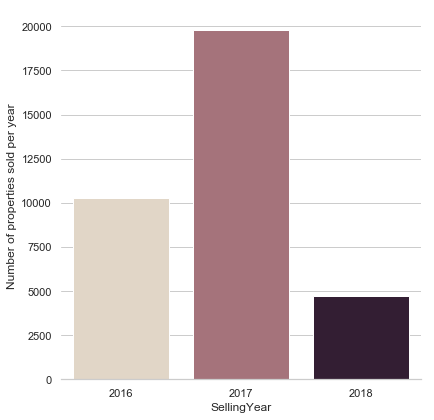

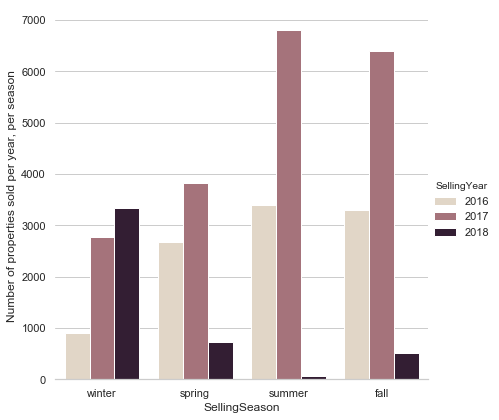

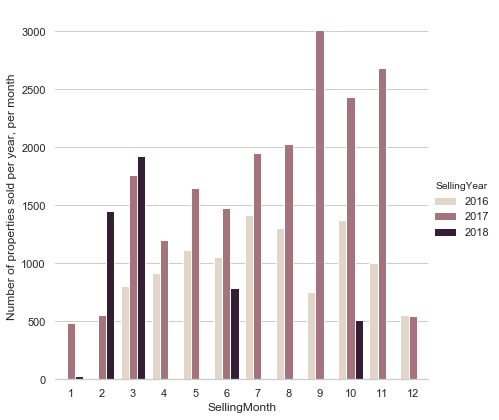

In [32]:
# Number of properties sold, per year
g = sns.catplot(x="SellingYear", data=housing_data, height=6, kind="count", palette="ch:.25")
g.despine(left=True)
g.set_ylabels("Number of properties sold per year")
plt.show()

# Number of properties sold, per year, per month
g = sns.catplot(x="SellingSeason", hue="SellingYear", data=housing_data, height=6, kind="count", palette="ch:.25")
g.despine(left=True)
g.set_ylabels("Number of properties sold per year, per season")
plt.show()

# Number of properties sold, per year, per month
g = sns.catplot(x="SellingMonth", hue="SellingYear", data=housing_data, height=6, kind="count", palette="ch:.25")
g.despine(left=True)
g.set_ylabels("Number of properties sold per year, per month")
plt.show()

Some interesting conclusion: 

- There was a surge in sales in winter time throughout these 3 years
- Probably, the total volume of sales is increasing. Which leads to the next point:
- There's probably a lot of misisng data from 2018

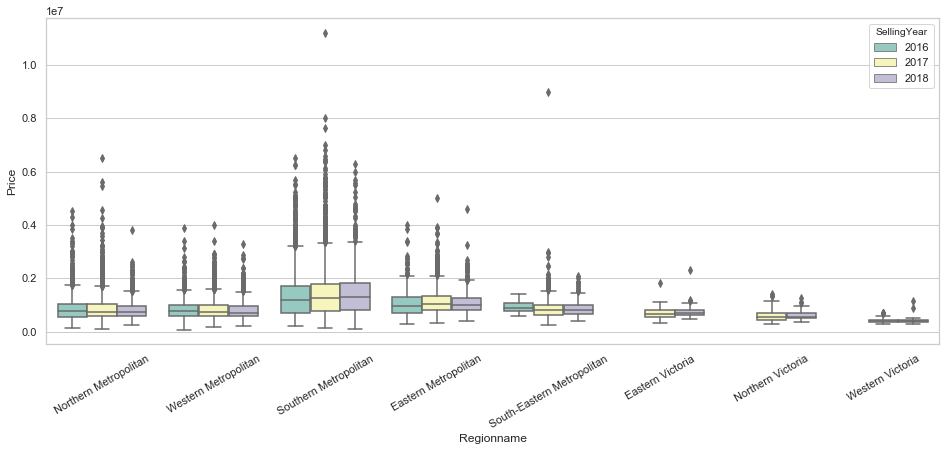

In [33]:
# Prices per region per year
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data = housing_data, x = 'Regionname', y = 'Price', hue = 'SellingYear', palette = 'Set3')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

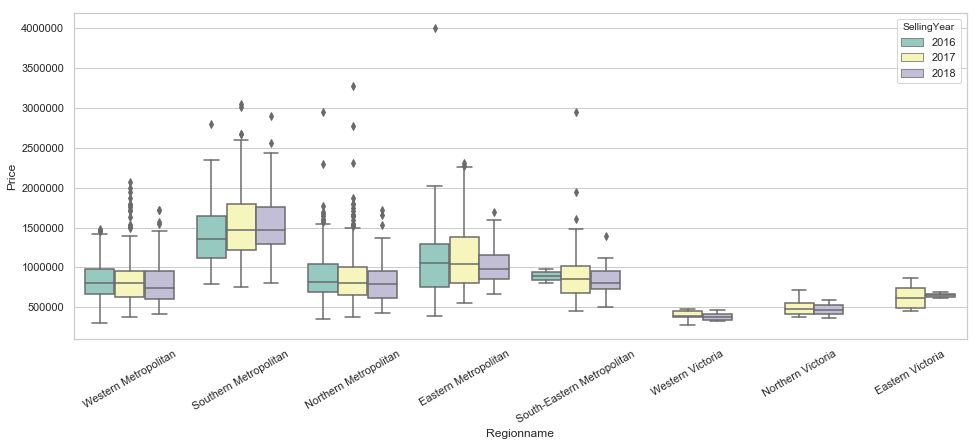

In [34]:
# Prices per region per year for the most typical property entry in the database
data = housing_data[housing_data['Rooms'] == 3]
data = data[data['Bathroom'] == 1.0]
data = data[data['Type'] == 'h']
data = data[data['Car'] == 2.0]
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data = data, x = 'Regionname', y = 'Price', hue = 'SellingYear', palette = 'Set3')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

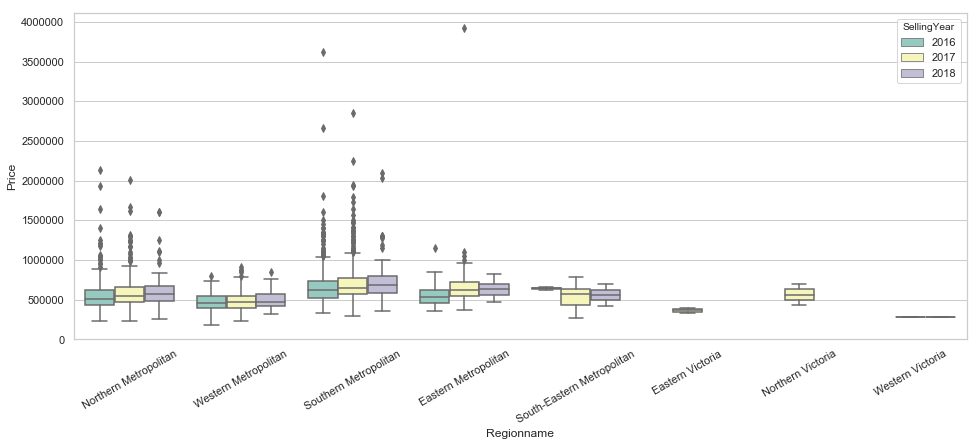

In [35]:
# Prices per region per year for a regular 2-rooms unit.
data = housing_data[housing_data['Rooms'] == 2]
data = data[data['Type'] == 'u']
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data = data, x = 'Regionname', y = 'Price', hue = 'SellingYear', palette = 'Set3')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

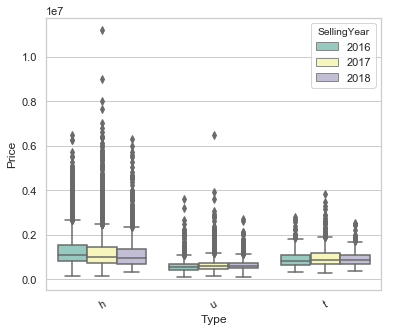

In [36]:
# Prices for house types during the years
plt.figure(figsize=(6, 5))
ax = sns.boxplot(data = housing_data, x = 'Type', y = 'Price', hue = 'SellingYear', palette = 'Set3')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

Some areas are becoming more desirable as the years pass, while others are "losing value":

- **Southern Metropolitan** is clearly gaining popularity, and it's probably the "downtown area" (I'm not familiar with Melbourne geography)
- Some of the outskirts are slightly losing value

Without any further knowledge on the city, the public transport connections, parks locaitons, etc..., I would probably say that South-Eastern metropolitan area seems the most convenient to buy a 2-rooms unit. For a usual 2-rooms unit (the typical apartment for young individuals, after graduation, for example), prices are definitely increasing year after year. And this is probably the "bubble" which the dataset's poster was talking about. 

On the other hand, prices for the most typical property in the dataset (a house/cottage/villa/semi/terrace with 3 rooms, 1 bedroom, 2 car slots) seems to be receding and, in general, proces for houses/cottages/etc are receding, while prices for units are increasing as the years pass (probably due to the fact that there's a much hugher demand of units in general, which drives the prices and "inflates" them above their real value). 

Now, let's test with some geographical data.

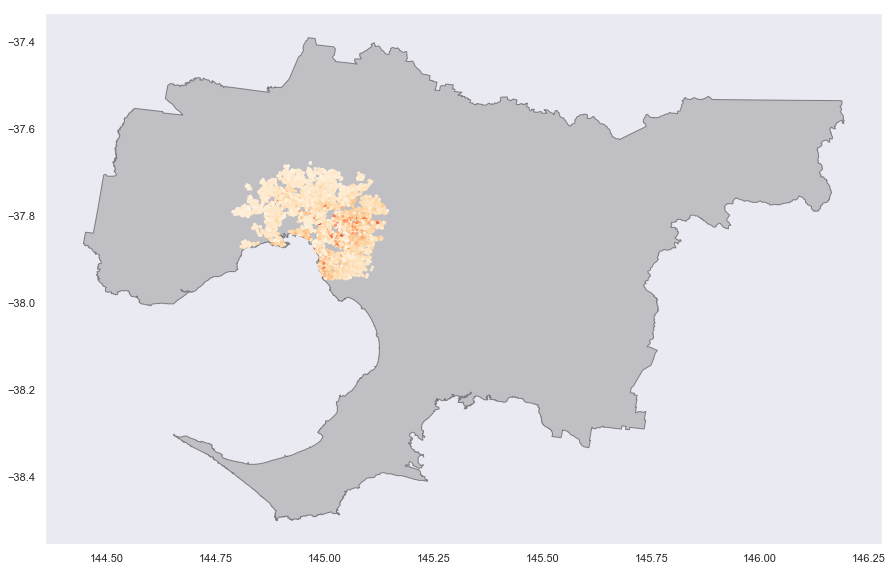

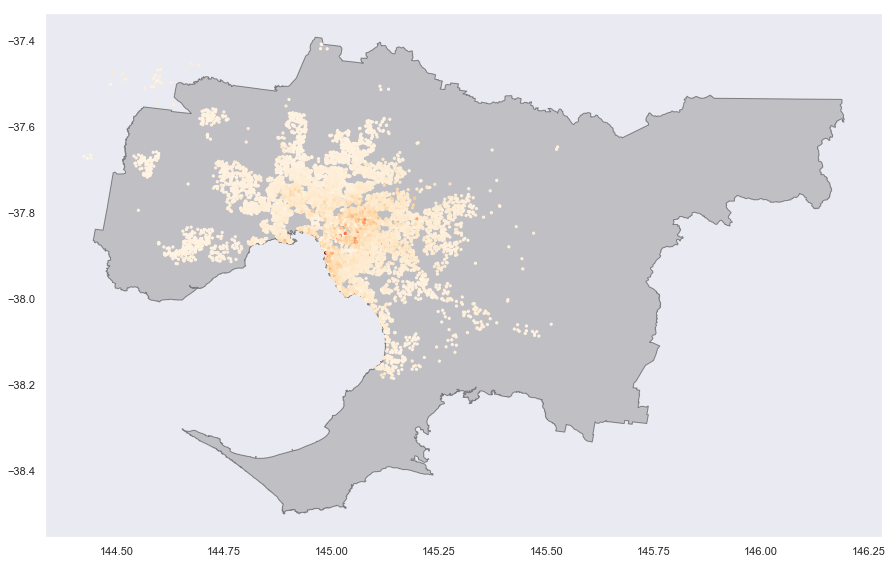

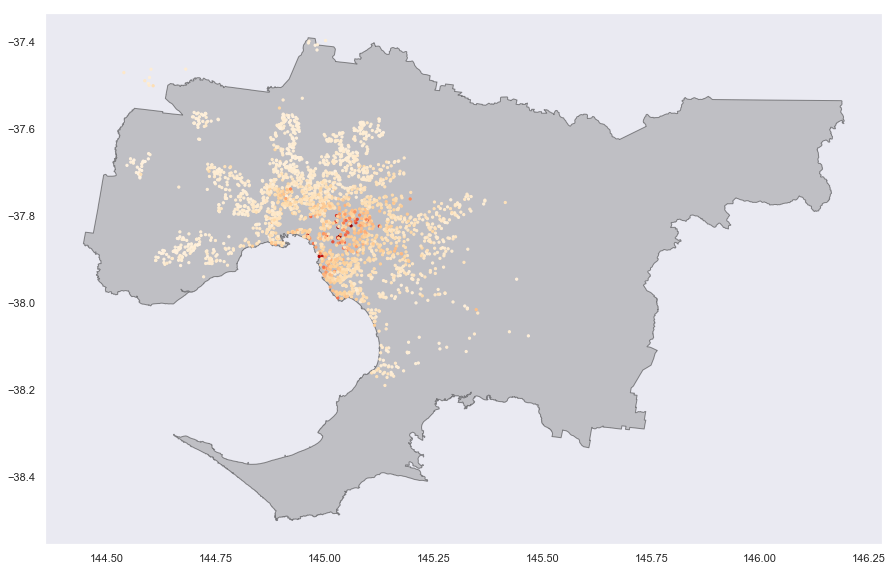

In [37]:
sns.set_style("dark")

map = gpd.read_file('/home/viscio/MACHINE_LEARNING/melbourne_housing_market/Metropolitan_map/Metropolitan_region_region.shp')
#map = gpd.read_file('/home/viscio/MACHINE_LEARNING/melbourne_housing_market/UrbanExtent2015/UrbanExtent2015_region.shp')

# coordinate system
crs = {'init': 'epsg:4326'}

for year in [2016, 2017, 2018]:

    df = housing_data[housing_data['SellingYear'] == year]

    # generate geometry points
    geometry = [Point(xy) for xy in zip(df['Longtitude'], df['Lattitude'])]

    # generate the dataframe
    geo_df = gpd.GeoDataFrame(df, 
                              crs = crs,
                              geometry = geometry
                             )
    fig, ax = plt.subplots(figsize = (15,15))
    map.plot(ax = ax, alpha = 0.4, color = 'grey', edgecolor = 'black')
    geo_df.plot(ax = ax, column='Price', legend = False, cmap='OrRd', s=5)
    plt.show()

# OUTLIERS ANALYSIS AND REMOVAL

From the previous analysis, we have seen that there's a presence of outliers. Outliers can be detrimental for the performance of our model, and they may be removed. Let's try to remove outliers in some of the categories, using the z-score (the number of standard deviations by which the value under analys is above the mean). 

The entire dataset seems to be comprised of many outliers. Usually, outliers removal is based on data having a z-score higher than 3. In this case, we can "relax" this a little bit, and try to keep data up to z-scores of 5. 

We eliminate outliers in most of the features.

In [38]:
# Let's start with outliers in "Price", "BuildingArea" and "Landsize"
# You could use scipy stats zscore, but you can also do that manually and control 
# the elimination process for each column.
#z = np.abs(stats.zscore(housing_data['Price']))

# We use a very "relaxed" outlier detection: 5 times the standard deviation!
def percent(num, denom, column):
    res= (num*100)/float(denom)
    print 'Outliers in', i, ' =', num
    print 'Outlier percentage in', i, "%.3f%%" % round(res,3)
    print ''

columns = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']
for i in columns:
    housing_data['is_outlier'] = (np.abs(housing_data[i] - housing_data[i].mean()) > 
                            (5*housing_data[i].std()))
    try: 
        num = housing_data["is_outlier"].value_counts()[1]
        denom = housing_data["is_outlier"].value_counts()[0]
    except:
        num = 0.0
        denom = housing_data["is_outlier"].value_counts()[0]
    #percentage of MV for Price
    percent(num, denom, i)   
    housing_data = housing_data[housing_data['is_outlier'] != True]
    housing_data = housing_data.drop(columns = ['is_outlier'])

Outliers in Rooms  = 33
Outlier percentage in Rooms 0.095%

Outliers in Price  = 110
Outlier percentage in Price 0.318%

Outliers in Distance  = 67
Outlier percentage in Distance 0.194%

Outliers in Bathroom  = 17
Outlier percentage in Bathroom 0.049%

Outliers in Car  = 53
Outlier percentage in Car 0.154%

Outliers in Landsize  = 55
Outlier percentage in Landsize 0.160%

Outliers in BuildingArea  = 19
Outlier percentage in BuildingArea 0.055%



# DATA VISUALIZATION, AGAIN - MOSTLY AIMED AT THE PREDICTIVE MODEL

After removing the outliers, let's look again at some of the graphs, and expand on the data exploration part with further analysis.

The most tipical proprty sold has 3 rooms, 1 bathroom and 2 cars, it's been sold in 2017, during either summer or fall (mostly typical in March or in October). 

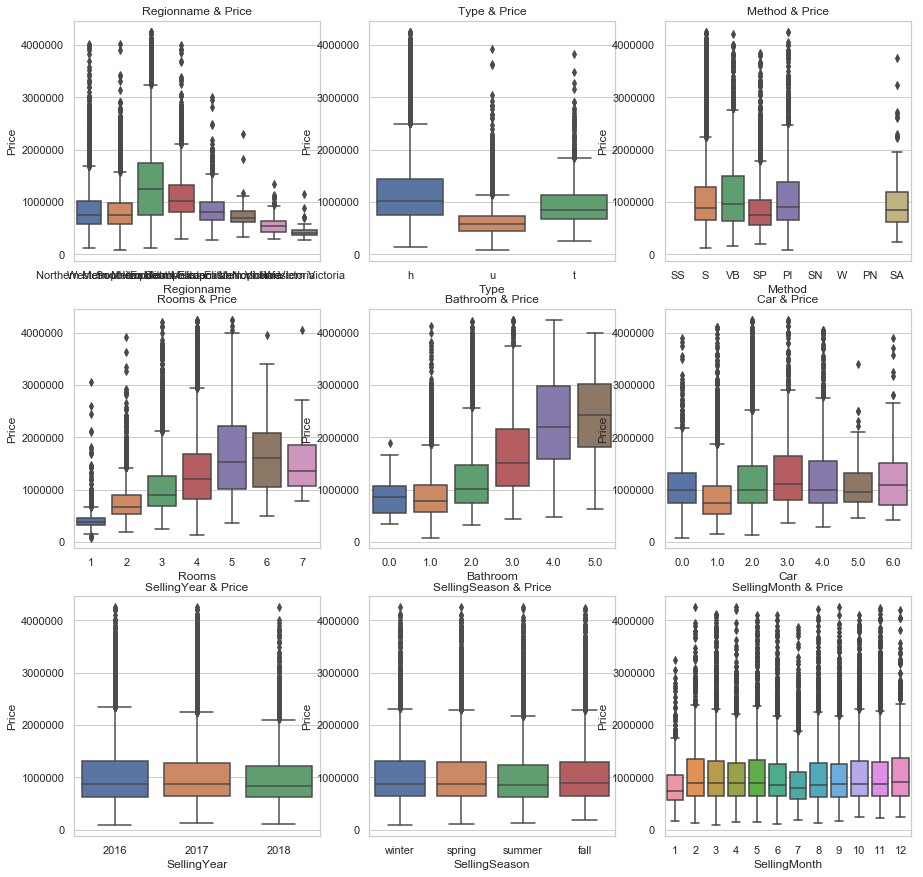

In [39]:
# Now, let's see boxplots again
sns.set_style('whitegrid')
f, axes = plt.subplots(3,3, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = housing_data, x = 'Regionname', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Regionname')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Regionname & Price')
# Plot [0,1]
sns.boxplot(data = housing_data, x = 'Type', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Type')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Type & Price')
# Plot [0,2]
sns.boxplot(data = housing_data, x = 'Method', y = 'Price', ax = axes[0, 2])
axes[0,2].set_xlabel('Method')
axes[0,2].set_ylabel('Price')
axes[0,2].set_title('Method & Price')
# Plot [1,0]
sns.boxplot(data = housing_data, x = 'Rooms', y = 'Price', ax = axes[1, 0])
axes[1,0].set_xlabel('Rooms')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Rooms & Price')
# Plot [1,1]
sns.boxplot(data = housing_data, x = 'Bathroom', y = 'Price', ax = axes[1, 1])
axes[1,1].set_xlabel('Bathroom')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Bathroom & Price')
# Plot [1,2]
sns.boxplot(data = housing_data, x = 'Car', y = 'Price', ax = axes[1, 2])
axes[1,2].set_xlabel('Car')
axes[1,2].set_ylabel('Price')
axes[1,2].set_title('Car & Price')
# Plot [2,0]
sns.boxplot(data = housing_data, x = 'SellingYear', y = 'Price', ax = axes[2, 0])
axes[2,0].set_xlabel('SellingYear')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('SellingYear & Price')
# Plot [2,1]
sns.boxplot(data = housing_data, x = 'SellingSeason', y = 'Price', ax = axes[2, 1])
axes[2,1].set_xlabel('SellingSeason')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('SellingSeason & Price')
# Plot [2,2]
sns.boxplot(data = housing_data, x = 'SellingMonth', y = 'Price', ax = axes[2, 2])
axes[2,2].set_xlabel('SellingMonth')
axes[2,2].set_ylabel('Price')
axes[2,2].set_title('SellingMonth & Price')

plt.show()

/home/viscio/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/viscio/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


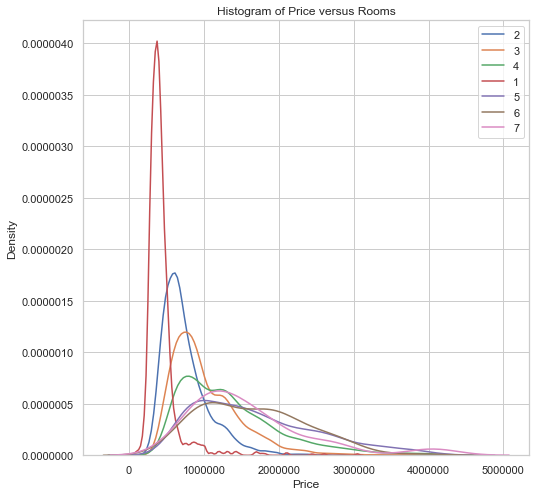

/home/viscio/anaconda2/lib/python2.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/viscio/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


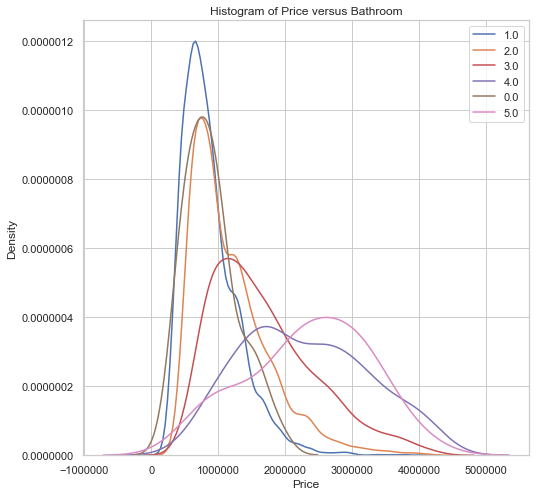

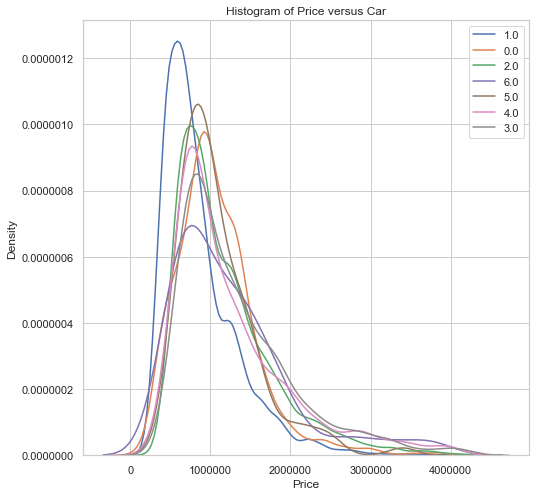

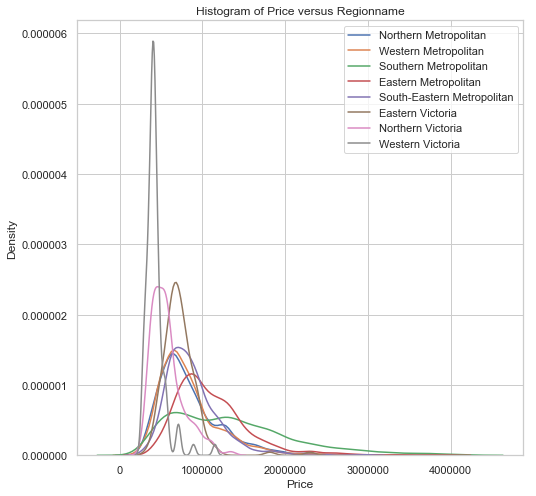

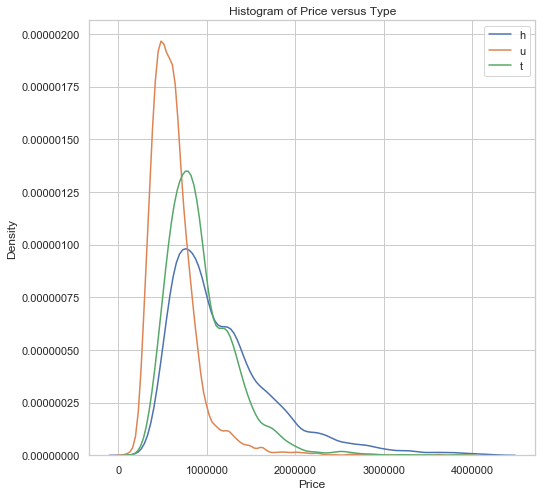

In [40]:
# Histograms for the Price vs. various quantities.
# same meanings as the graphs above, but in a different style.
def plot_density_hist(dataframe, cols, target_col, bins = 10, hist = False):
    for col in cols:
        target_categories = dataframe.loc[:,target_col].unique()
        fig = plt.figure(figsize=(8,8)) 
        sns.set_style("whitegrid")
        for cat in target_categories:
            sns.distplot(dataframe.loc[dataframe.loc[:,target_col] == cat, col], 
                         label = cat, bins = bins, rug=False, hist = hist)
        plt.title('Histogram of ' + col + ' versus ' + target_col) 
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.show()
        
cols = ['Price']
plot_density_hist(housing_data, cols, 'Rooms', bins = 20, hist = False)
plot_density_hist(housing_data, cols, 'Bathroom', bins = 20, hist = False)
plot_density_hist(housing_data, cols, 'Car', bins = 20, hist = False)
plot_density_hist(housing_data, cols, 'Regionname', bins = 20, hist = False)
plot_density_hist(housing_data, cols, 'Type', bins = 20, hist = False)

From these charts, we can learn some things (especially for the future predictive machine learning model): 

- **Regionname** definitely has an impact on the price
- **Type** has an impact on the price
- The price tends to increase with increasing **Rooms** and **Bathrooms**, but the relation with **Car** is a little more complicated. 
- **Method** could tell us something about the price too
- **SellingYear** and **SellingSeason** do not affect prices, it seems. Or, at least, they affect it marginally. 
- **SellingMonth** can bear some information on prices, but even in this case it's not really critical. 

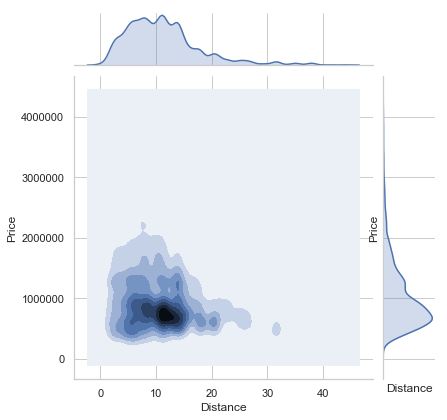

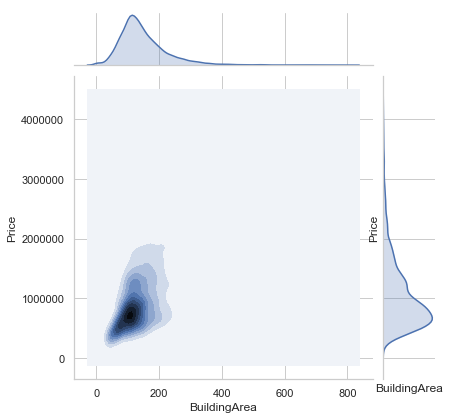

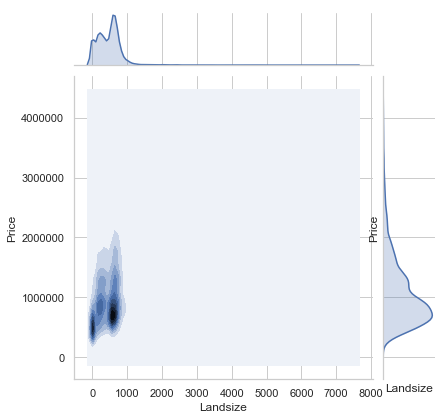

In [41]:
def plot_desity_2d(df, cols, col_y = 'Price', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=df, kind=kind)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.show()

num_cols = ['Distance', 'BuildingArea', 'Landsize']
plot_desity_2d(housing_data, num_cols) 

Again, some conclusion: 
    
- **Distance**, **BuildingArea** and **Landsize** clearly have an impact on the final price of a property.
- The problem here is that there's a lot of values missing from these features (especially BuildingArea and Landsize), and it can be tricky to correctly impute them (if it's to be decided to impute them and not iscard them alltogether). 

In [42]:
housing_data.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
HouseAge                float64
Day                       int64
SellingYear               int64
SellingMonth              int64
SellingSeason            object
dtype: object

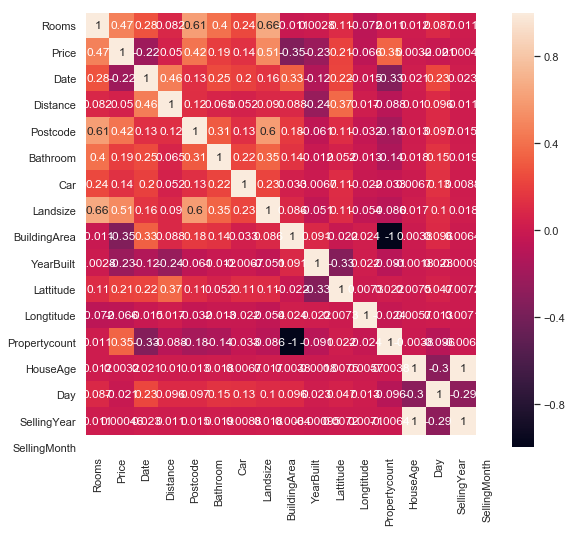

In [43]:
# FEATURES CORRELATION
corr_df = housing_data.drop(columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'SellingSeason'])
corr = corr_df.corr()
fig = plt.figure(figsize=(9,8)) # define plot area
ax = sns.heatmap (corr, xticklabels = corr_df.columns.values, yticklabels = corr_df.columns.values, annot = True)
#plt.setp(ax.xaxis.get_majorticklabels())
#plt.setp(ax.yaxis.get_majorticklabels())
plt.show()

# DATA IMPUTATION OF MISSING VALUES

Strictly speaking, imputation should be done after train/test splitting, in a machine learning framework. 

However, if we impute features with a really small number of NaNs, this should not alter significantly the feature's statistical distribution. 

On the other hand, if we have features with a high number of missing values, the imputation procedure should be done after the train/test splitting of the data. 

From a StackExchange thread: 

"You should split before pre-processing or imputing.

The division between training and test set is an attempt to replicate the situation where you have past information and are building a model which you will test on future as-yet unknown information: the training set takes the place of the past and the test set takes the place of the future, so you only get to test your trained model once.

Keeping the past/future analogy in mind, this means anything you do to pre-process or process your data, such as imputing missing values, you should do on the training set alone. You can then remember what you did to your training set if your test set also needs pre-processing or imputing, so that you do it the same way on both sets."

In [44]:
# First of all, it's probably a good idea not to impute target values. That's the algorithm's job, after all. 
# If we could impute proces safely, there's no need of a ML algorithm to predict values. 
# Also, since these are target values, they can lead the algorithm to wrong directions. 
# These values should be dropped, I think.
housing_data = housing_data.dropna(subset=['Price'])
housing_data = housing_data.dropna(subset=['SellingSeason'])

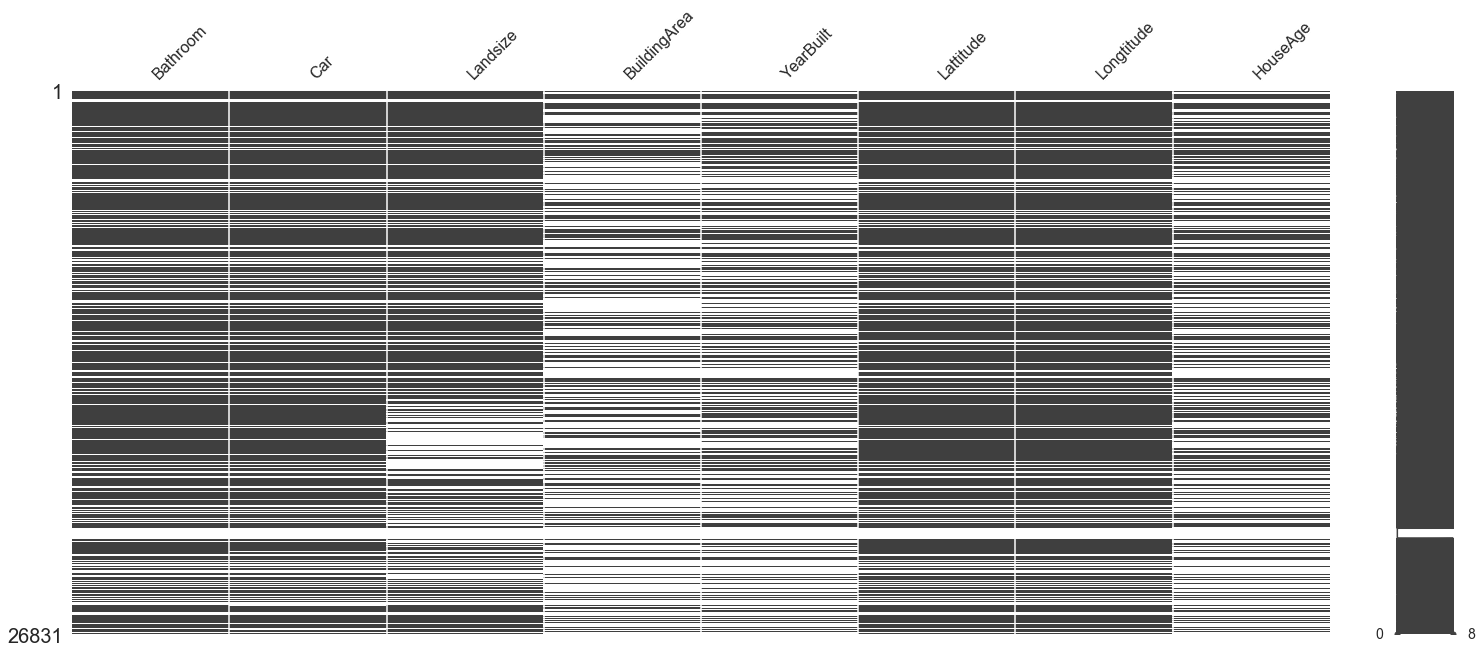

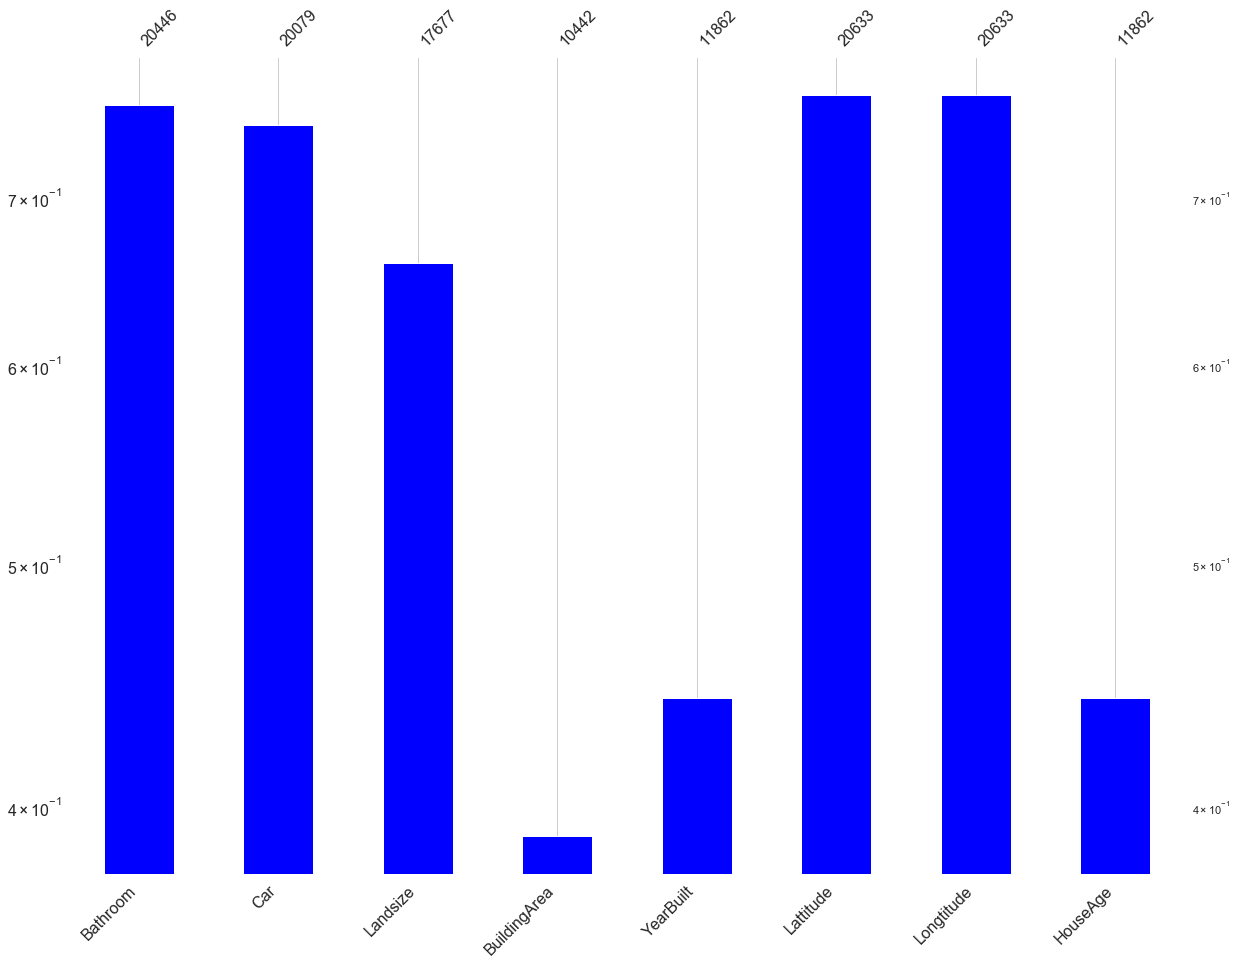

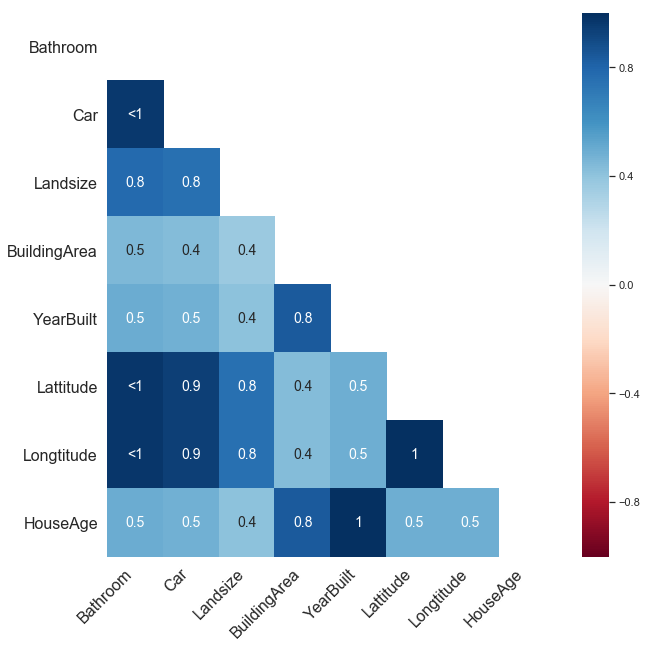

In [45]:
# Visualize the missing data
missingdata_df = housing_data.columns[housing_data.isnull().any()].tolist()
msno.matrix(housing_data[missingdata_df])
plt.show()
msno.bar(housing_data[missingdata_df], color="blue", log=True, figsize=(20,15))
plt.show()
msno.heatmap(housing_data[missingdata_df], figsize=(10,10))
plt.show()

Let's keep it simple and try to work with mean, median and mode values and see if we can impute something

In [46]:
# We're not going to work wit Latitude/Longitude, nor with YearBuilt, so we drop these columns
housing_data = housing_data.drop(axis = 1, columns = ['Lattitude', 'Longtitude', 'YearBuilt'])

In [47]:
# Let's check the mean distribution of Bathroom and Car
print housing_data.groupby('Rooms')['Bathroom'].mean()
print housing_data.groupby('Rooms')['Car'].mean()

Rooms
1    1.007833
2    1.130968
3    1.480939
4    2.043826
5    2.644421
6    2.904762
7    2.888889
Name: Bathroom, dtype: float64
Rooms
1    0.894875
2    1.150417
3    1.748655
4    2.076694
5    2.337895
6    2.485714
7    2.647059
Name: Car, dtype: float64


In [48]:
# There's a data point with 9 rooms and NaN in both categories, let's check it
weird_entry = housing_data[housing_data['Rooms'] == 9]
weird_entry.head()

# As we can see, this data point seems problematic since it misses a lot of features. We can remove it
housing_data = housing_data[housing_data['Rooms'] != 9]

In [49]:
# Impute Bathroom and Car based on the mode
# NOTE: the removal of the "9 rooms" entry previously has also been done because the procedure below would raise
#       an index error, due to the fact that the "9 rooms" group would have a NaN as the mode, and the instruction
#       would fail. Using mode with .fillna and .groupby is still not straightforward with Pandas. 
housing_data['Bathroom'] = housing_data.groupby('Rooms')['Bathroom'].apply(lambda x: x.fillna(x.mode()[0]))
housing_data['Car'] = housing_data.groupby('Rooms')['Car'].apply(lambda x: x.fillna(x.mode()[0]))

# Other possibility: Imputing Bathrooms and Car based on the mean
#housing_data['Bathroom'].fillna(housing_data.groupby('Rooms')['Bathroom'].transform('mean'), inplace = True)
#housing_data['Car'].fillna(housing_data.groupby('Rooms')['Car'].transform('mean'), inplace = True)

In [50]:
housing_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom             0
Car                  0
Landsize          9154
BuildingArea     16389
CouncilArea          0
Regionname           0
Propertycount        0
HouseAge         14969
Day                  0
SellingYear          0
SellingMonth         0
SellingSeason        0
dtype: int64

For the imputation of the remaining variables, the situaiton is trickier. There are a lot of misisng values, and a median/mean/mode imputation strategy can wildly alter the statistical distribution of the feature. There are 2 options here:

1. Completely dump features with that high number of missing values (but doing so you can risk losing information, especially with Landsize and BuildingArea, which are closely related to price, so they should be important);
2. Do a Multivariate Feature Imputation, in a similar fashion as the R MICE package (Multivariate Imputation by Chained Equations). This has to be done inside the ML model, since it's a scikit-learn package. 

Here, we try the approach no. 2 and see how it works. 

# DATA ANALYSIS - CONCLUSIONS

After this analysis, we can finally say something regarding what features are or are not meaningful. In the end, we can drop these columns: 

- Suburb, Address, CouncilArea, Postcode (Redundant, we can maintain information on CouncilArea, with less granularity)
- Day, SellingYear, SellingMonth, SellingSeason (because we saw they don't really define prices)
- SellerG (doesn't bring ifnormation on price, and it's too granular)

In [51]:
housing_data = housing_data.drop(columns = ['Suburb', 'Address', 'CouncilArea', 'Postcode', 
                                            'Day', 'SellingYear', 'SellingMonth', 'SellingSeason', 'Date',
                                            'SellerG'])

# MACHINE LEARNING MODEL

In [52]:
housing_data = housing_data.dropna(subset=['Landsize', 'BuildingArea', 'HouseAge'])

In [53]:
# Types of the features left
housing_data.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
Regionname        object
Propertycount    float64
HouseAge         float64
dtype: object

First, let's prepare the data. Scikit-learn accepts only numpy arrays. 

Also, we have some categorical variables that need to be encoded. The strategy used here is one-hot encoding. 

This part remains fixed for every method we decide to use. 

In [75]:
# First, create an X array with all the non categorical features
X = housing_data.drop(columns = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount', 'HouseAge', 'Price'])

# ONE-HOT-ENCODING
# instantiate an one-hot encoder
enc = preprocessing.OneHotEncoder()
# fit the encoder
enc.fit(X)
# transform the data
onehotlabels = enc.transform(X).toarray()

# Create a dummy array for regular non categorical data
dummy_2 = housing_data.drop(columns = ['Type', 'Method', 'Regionname', 'Price'])
new_table = np.array(dummy_2)

In [76]:
# Generate X and y arrays:
X = np.hstack((new_table, onehotlabels))
print 'Shape of features array: ', X.shape
y = np.array(housing_data['Price'])
print 'Shape of label array: ', y.shape

Shape of features array:  (8858, 24)
Shape of label array:  (8858,)


Let's start simple and see how far we can go - let's then build a Linear Regression model, using scikit - learn. No hyperparameter tuning, nothing fancy at all here. Just plain "test" of how far from linearity is our data. 

In [77]:
# separate in test and train, 10% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

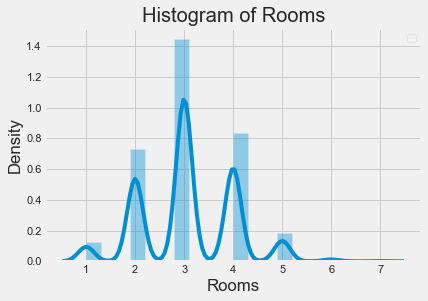

ValueError: supplied range of [-inf, 1.64542226935] is not finite

In [78]:
cols = ['Rooms', 'Distance', 'Bathroom', 'Car', 'BuildingArea', 'Propertycount', 'HouseAge']
for col in cols: 
    sns.distplot(housing_data[col], bins = 20, rug = False, hist = True)
    plt.title('Histogram of ' + col) 
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend() 
    plt.show()

In [58]:
# Scale features, but not the ones obtained from OneHotEncoder. 
standard_scaler = preprocessing.StandardScaler().fit(X_train[:,0:8])
X_train[:,0:8] = standard_scaler.transform(X_train[:,0:8])
X_test[:,0:8] = standard_scaler.transform(X_test[:,0:8])



#minmax_scaler = preprocessing.MinMaxScaler().fit(X_train[:,7:])
#X_train[:,10:15] = minmax_scaler.transform(X_train[:,7:])
#X_test[:,10:15] = minmax_scaler.transform(X_test[:,10:15])

In [59]:
# Linear model
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

print(lin_mod.intercept_)
print(lin_mod.coef_)

-1.3116637421979587e+19
[ 5.81492791e+05 -1.66295961e+06  6.11111666e+05  2.39372269e+05
  5.68869003e+05  1.83787670e+06  2.17786213e+04  6.48703242e+05
  1.88951204e+18  1.88951204e+18  1.88951204e+18 -1.70851299e+16
 -1.70851299e+16 -1.70851299e+16 -1.70851299e+16 -1.70851299e+16
  1.12442105e+19  1.12442105e+19  1.12442105e+19  1.12442105e+19
  1.12442105e+19  1.12442105e+19  1.12442105e+19  1.12442105e+19]


Mean Square Error      = 121168189848.83127
Root Mean Square Error = 348092.214577
Mean Absolute Error    = 248254.40801354402
Median Absolute Error  = 186304.0
R^2                    = 0.6859351853684499
Adjusted R^2           = 0.6828912276439708


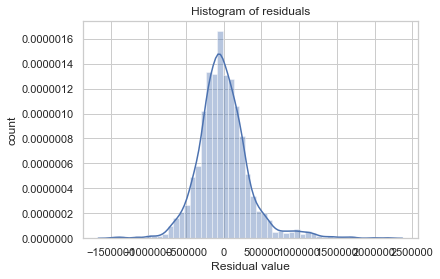

In [61]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = metrics.r2_score(y_true, y_predicted)
    r2_adj = r2 - float((n_parameters - 1))/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(metrics.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(metrics.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(metrics.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(metrics.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 18) 

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
hist_resids(y_test, y_score) 

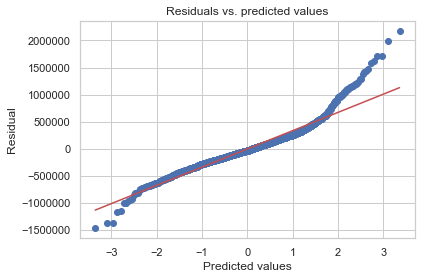

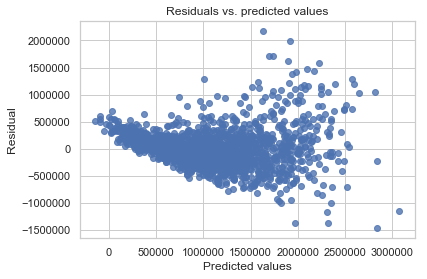

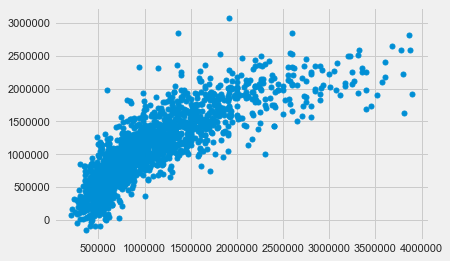

In [62]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
resid_qq(y_test, y_score)   

def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

resid_plot(y_test, y_score) 

# Usual graph with differences between test data and predicted data
plt.style.use('fivethirtyeight')
plt.plot(y_test, y_score, 'o', markersize=5)
plt.show()

Results are pretty bad. Let's try with something a little bit more sophisticated. We will use a Random Forest Classifier, and try to tune hyperparameters for that. 

In [63]:
# separate in test and train, 20% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [64]:
# K-Fold grid search for parameters optimization, as suggested in scikit-learn manual

# when we train on a certain fold, we use a second cross-validation split in order to choose hyperparameters
cv = KFold(n_splits = 5, shuffle = True)

# Chosen model (Random Forest) and hyperparameters to choose
rfr = RandomForestRegressor(random_state = 42)

# Define a standard scaler
std_scaler = StandardScaler()

In [65]:
# Now, we do a Grid Search
params = [{'randomforestregressor__n_estimators': [200],
           'randomforestregressor__min_samples_split': [20, 25],
           'randomforestregressor__max_depth': [9, 11, 13],
           'randomforestregressor__min_samples_leaf': [20, 25],
           'randomforestregressor__max_features': [5, 10, 15]
         }]

# find the model with the best generalization error
pipe = make_pipeline(std_scaler,
                     rfr)

# Perform the grid search proper
regressor = GridSearchCV(estimator = pipe, 
                         param_grid = params, 
                         cv = cv,  
                         n_jobs = -1, 
                         #scoring = 'neg_mean_absolute_error',
                         iid = False)

# Fit the model
regressor.fit(X_train, y_train)
print('TRAIN Best Params:', regressor.best_params_)

('TRAIN Best Params:', {'randomforestregressor__max_depth': 13, 'randomforestregressor__max_features': 15, 'randomforestregressor__min_samples_leaf': 20, 'randomforestregressor__min_samples_split': 20, 'randomforestregressor__n_estimators': 200})


In [66]:
# Predicted quantities for the best case scenario, either for the train and test situations
y_pred_train = regressor.predict(X_train)
y_pred_test  = regressor.predict(X_test)

# Some metrics:
# 1) mean absolute error (MAE)
print 'Train MAE:', mean_absolute_error(y_train, y_pred_train)
print 'Test  MAE:', mean_absolute_error(y_test, y_pred_test)
# 2) root mean squared error (RMSE)
print 'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'Test  RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test))
# 3) loss function ((y_true - y_true.mean()) ** 2).sum() as provided by .score method
print 'Train score:', regressor.score(X_train, y_train)
print 'Test  score:', regressor.score(X_test, y_test)

Train MAE: 161139.28151648998
Test  MAE: 175267.61711164215
Train RMSE: 255214.68059929658
Test  RMSE: 270510.0194070955
Train score: 0.8280347150761463
Test  score: 0.8103305541571317


In [67]:
# Check the train/test scores of the splits, for each combination of the hyperparameters. 
# 1) The mean performances should all be in the same "range"
# 2) The differences between the train and test scores should be small, so to not have overfit.

def plot_cv(reg, params_grid):
      
    keys = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',  
            'split4_test_score']
    grid = np.array([reg.cv_results_[key] for key in keys])
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameters')
    print('Mean performance   STD performance')
    for y,z in zip(means, stds):
        print ('%6.5f            %6.5f' % (y,z))
    
plot_cv(regressor, params)  

Performance metrics by parameters
Mean performance   STD performance
0.76259            0.01868
0.76259            0.01868
0.75557            0.01915
0.75557            0.01915
0.78236            0.02012
0.78236            0.02012
0.77528            0.02058
0.77528            0.02058
0.78560            0.02183
0.78560            0.02183
0.77989            0.02239
0.77989            0.02239
0.76702            0.01774
0.76702            0.01774
0.75778            0.01951
0.75778            0.01951
0.78424            0.01973
0.78424            0.01973
0.77788            0.02046
0.77788            0.02046
0.78786            0.02204
0.78786            0.02204
0.78079            0.02319
0.78079            0.02319
0.76842            0.01735
0.76842            0.01735
0.76029            0.01862
0.76029            0.01862
0.78604            0.01970
0.78604            0.01970
0.77881            0.02026
0.77881            0.02026
0.78835            0.02233
0.78835            0.02233
0.78169      

In [68]:
# Outer loop
outside = KFold(n_splits = 5, shuffle = True)
cv_estimate = cross_val_score(regressor, X, y, cv = outside)

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.798
SDT of the metric       = 0.005
Outcomes by cv fold
Fold  1    0.800
Fold  2    0.805
Fold  3    0.800
Fold  4    0.795
Fold  5    0.791


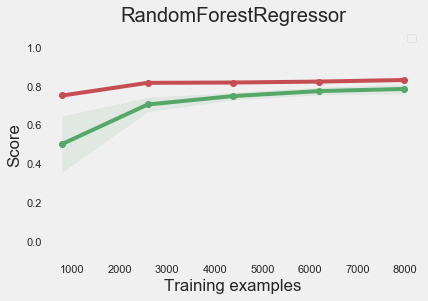

In [69]:
# Check for overfitting with learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor.best_estimator_, X, y, train_sizes = np.linspace(.1, 1.0, 5), cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("RandomForestRegressor")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()

# box-like grid
plt.grid()

# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()

Looking at the curves, it seems that the model doesn't overfit. An 80% accuracy, with a mean absolute error around 160k-170k is not too bad (it could be better, maybe with more sophisticated models). 

# PERFORMANCE OF THE BEST MODEL

In [70]:
# Divide into train and test sets
indx = range(X.shape[0])
indx = train_test_split(indx, test_size = 0.3, random_state = 42, shuffle = True)
X_train = X[indx[0],:]
y_train = y[indx[0]]
X_test  = X[indx[1],:]
y_test  = y[indx[1]]

In [71]:
# Apply the scaler
scaler = regressor.best_estimator_.steps[0][1]
scaler.transform(X_train)

array([[0.33333333, 0.17873303, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.44343891, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.04751131, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 0.04751131, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.17647059, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.14027149, 0.25      , ..., 1.        , 0.        ,
        0.        ]])

In [72]:
# Apply the best regressor
best_rf = regressor.best_estimator_.steps[1][1]
best_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [73]:
# Predicted quantities for the best case scenario, either for the train and test situations
y_pred_train = best_rf.predict(X_train)
y_pred_test  = best_rf.predict(X_test)

# Some metrics:
# 1) mean absolute error (MAE)
print 'Train MAE:', mean_absolute_error(y_train, y_pred_train)
print 'Test  MAE:', mean_absolute_error(y_test, y_pred_test)
# 2) root mean squared error (RMSE)
print 'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'Test  RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test))
# 3) loss function ((y_true - y_true.mean()) ** 2).sum() as provided by .score method
print 'Train score:', best_rf.score(X_train, y_train)
print 'Test  score:', best_rf.score(X_test, y_test)

Train MAE: 163621.92689487562
Test  MAE: 176906.8628810043
Train RMSE: 257985.28541110756
Test  RMSE: 277008.52115672076
Train score: 0.8251396863686544
Test  score: 0.797642191275933


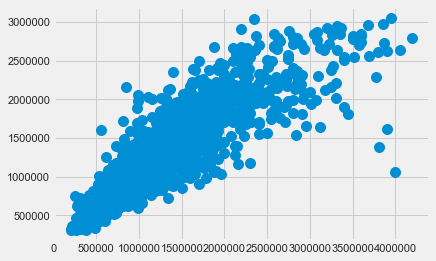

In [74]:
# Usual graph with differences between test data and predicted data
plt.style.use('fivethirtyeight')
plt.plot(y_test, y_pred_test, 'o', markersize=10)
plt.show()